In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [ ]:
f  = open('Data/sid_chat.txt',encoding='utf8')

In [ ]:
p = f.read()

In [ ]:
p=p.replace('AM','').replace('PM','').replace('pm','').replace('am','')

6/18/21, 10:10  - Sid: 105

In [ ]:
pt = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s\s-\s'

In [ ]:
messages = re.split(pt,p)[1:]

In [ ]:
dates = re.findall(pt,p)
new_dates = []
for i in dates:
    if '\u202f - ' in i:
        i = i.replace('\u202f - ','')
    else:
        i = i.replace('  - ','')
    new_dates.append(i)

In [ ]:
msg_data = pd.DataFrame({"user_message":messages,"message_date":new_dates})
msg_data["message_date"] = pd.to_datetime(msg_data["message_date"],format='%m/%d/%Y, %H:%M',infer_datetime_format=True)
msg_data.rename(columns={'message_date':'date'},inplace=True)


In [ ]:
msg_data

In [ ]:
users = []
messages = []
for message in msg_data['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
msg_data['user'] = users
msg_data['message'] = messages
msg_data.drop(columns=['user_message'],inplace=True)

In [ ]:
msg_data

In [ ]:
msg_data['year'] = msg_data['date'].dt.year
msg_data['month'] = msg_data['date'].dt.month_name()
msg_data['day'] = msg_data['date'].dt.day
msg_data['hour'] = msg_data['date'].dt.hour
msg_data['minute'] = msg_data['date'].dt.minute

In [ ]:
msg_data = msg_data[msg_data['user']!='group_notification']
msg_data

In [ ]:
from urlextract import URLExtract
extractor = URLExtract()
extractor.find_urls('www.google google.com manujupadhyay850@gmail.com stackoverflow.com')

In [ ]:
msg_data['message']

In [ ]:
links = []
for message in msg_data['message']:
    links.extend(extractor.find_urls(message))
print(len(links))

In [ ]:
print(list(msg_data['user'].value_counts().head()))
print(msg_data['user'].value_counts().head().keys())

In [ ]:
plt.bar(msg_data['user'].value_counts().head().keys(),height=msg_data['user'].value_counts().head())

In [ ]:
round((msg_data['user'].value_counts()/ msg_data.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

In [ ]:
a = sb.barplot(x=msg_data['user'].value_counts().head().keys(),y=msg_data['user'].value_counts().head())
a.bar_label(a.containers[0], fmt='%.1f')
a.set_xticklabels(labels=msg_data['user'].value_counts().head().keys(),rotation=90)
plt.show()

In [ ]:
temp = msg_data[msg_data['user']!='group_notification']
temp = temp[temp['message']!='<Media omitted>\n']

In [ ]:
words = []

for message in msg_data['message']:
    words.extend(message.split())
words.count('group_notification')
a = 'group_notification'
a.split()

In [ ]:
from collections import Counter
from wordcloud import WordCloud
w = WordCloud()
stopwords = list(w.stopwords) + ['omitted>','<Media','changed.','voice','Missed','end-to-end','encrypted.','calls']
b = []
for i in words:
    if i not in stopwords:
        b.append(i)
len(b)
pd.DataFrame(list(Counter(b).most_common(30)))

In [ ]:
import emoji
from emoji.unicode_codes import EMOJI_DATA

In [ ]:
emojis=[]
for message in msg_data['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [ ]:
len(emojis)

In [ ]:
num_emoji = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [ ]:
num_emoji.rename({0:"Top Emojis",1:"Number of Time Emojis Used"})

In [92]:
msg_data['month_num'] = msg_data['date'].dt.month 
msg_data

C:\Users\Basic\AppData\Local\Temp\ipykernel_6632\3058282860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg_data['month_num'] = msg_data['date'].dt.month


,date,user,message,year,month,day,hour,minute,month_num
1,2021-05-18 12:24:00,Manuj Upadhyay,Hii\n,2021,May,18,12,24,5
2,2021-05-18 12:43:00,Sid,Hi\n,2021,May,18,12,43,5
3,2021-05-20 09:43:00,Manuj Upadhyay,"Any process of pancard, bank account ? 🙄\n",2021,May,20,9,43,5
4,2021-05-20 10:23:00,Sid,Yes\n,2021,May,20,10,23,5
5,2021-05-20 10:23:00,Sid,I got a pan card\n,2021,May,20,10,23,5
...,...,...,...,...,...,...,...,...,...
1258,2023-03-18 02:58:00,Manuj Upadhyay,<Media omitted>\n,2023,March,18,2,58,3
1259,2023-03-18 02:58:00,Manuj Upadhyay,Sir ji isko Shanti se padhna\n,2023,March,18,2,58,3
1260,2023-03-26 09:30:00,Manuj Upadhyay,<Media omitted>\n,2023,March,26,9,30,3
1261,2023-04-27 07:19:00,Manuj Upadhyay,Hey\n,2023,April,27,7,19,4


In [107]:
timeline = msg_data.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2021,5,May,35
1,2021,6,June,230
2,2021,7,July,225
3,2021,8,August,82
4,2021,9,September,23
5,2021,10,October,23
6,2021,11,November,8
7,2021,12,December,113
8,2022,1,January,97
9,2022,3,March,26


In [108]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
timeline['time'] = time

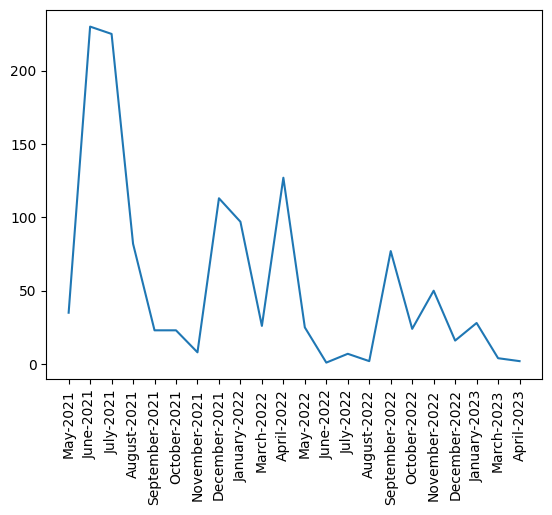

In [109]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [110]:
msg_data['only_date'] =  msg_data['date'].dt.date

C:\Users\Basic\AppData\Local\Temp\ipykernel_6632\525521077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg_data['only_date'] =  msg_data['date'].dt.date


In [111]:
msg_data

,date,user,message,year,month,day,hour,minute,month_num,only_date
1,2021-05-18 12:24:00,Manuj Upadhyay,Hii\n,2021,May,18,12,24,5,2021-05-18
2,2021-05-18 12:43:00,Sid,Hi\n,2021,May,18,12,43,5,2021-05-18
3,2021-05-20 09:43:00,Manuj Upadhyay,"Any process of pancard, bank account ? 🙄\n",2021,May,20,9,43,5,2021-05-20
4,2021-05-20 10:23:00,Sid,Yes\n,2021,May,20,10,23,5,2021-05-20
5,2021-05-20 10:23:00,Sid,I got a pan card\n,2021,May,20,10,23,5,2021-05-20
...,...,...,...,...,...,...,...,...,...,...
1258,2023-03-18 02:58:00,Manuj Upadhyay,<Media omitted>\n,2023,March,18,2,58,3,2023-03-18
1259,2023-03-18 02:58:00,Manuj Upadhyay,Sir ji isko Shanti se padhna\n,2023,March,18,2,58,3,2023-03-18
1260,2023-03-26 09:30:00,Manuj Upadhyay,<Media omitted>\n,2023,March,26,9,30,3,2023-03-26
1261,2023-04-27 07:19:00,Manuj Upadhyay,Hey\n,2023,April,27,7,19,4,2023-04-27


In [114]:
daily_timeline = msg_data.groupby('only_date').count()['message'].reset_index()

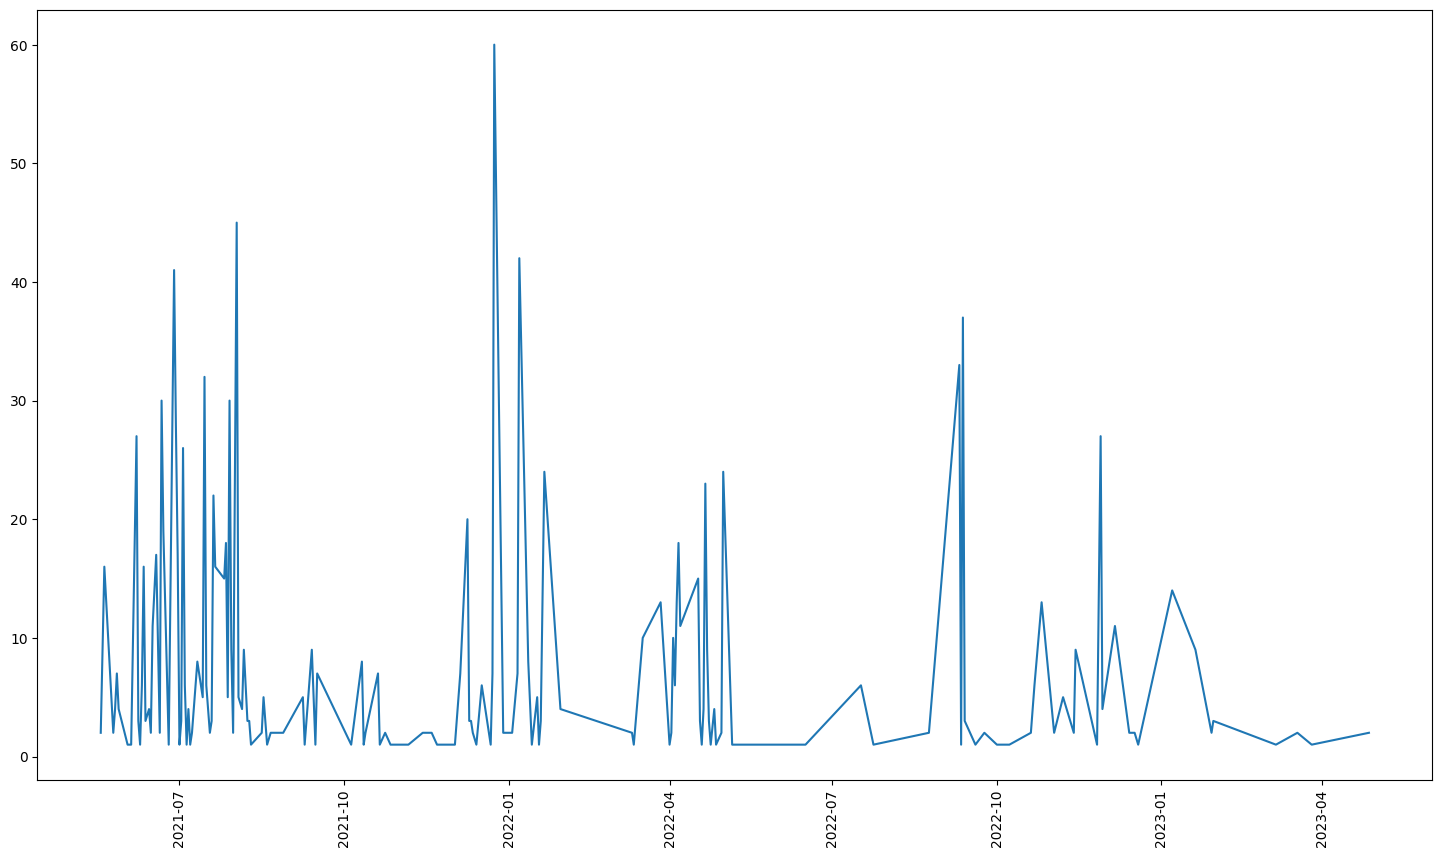

In [116]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [123]:
msg_data['date'].dt.day_name()


1        Tuesday
2        Tuesday
3       Thursday
4       Thursday
5       Thursday
          ...   
1258    Saturday
1259    Saturday
1260      Sunday
1261    Thursday
1262    Thursday
Name: date, Length: 1225, dtype: object

In [120]:
mbd = msg_data['day_name'].value_counts().reset_index()

In [121]:
mbd

,index,day_name
0,<bound method PandasDelegate._add_delegate_acc...,1225
